# Preparing the dataset for hippocampus segmentation



In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil


## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

In [ ]:
# Load an image and a segmentation mask into variables called image and label

names = sorted(os.listdir('/data/TrainingSet/labels'))
images = [nib.load('/data/TrainingSet/images/'+name) for name in names]
labels = [nib.load('/data/TrainingSet/labels/'+name) for name in names]

In [ ]:
for i, img in enumerate(images):
    if img.shape[0]>100:
        print(img.shape, names[i], i)
    
# hippocampus_010.nii.gz, hippocampus_281.nii.gz are outlers

(512, 512, 241) hippocampus_010.nii.gz 6
(512, 512, 31) hippocampus_281.nii.gz 179


In [ ]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?


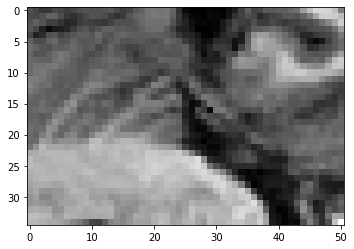

In [ ]:
img1_sl1 = images[0].get_fdata()[:,:,0]
plt.imshow(img1_sl1, cmap='gray')

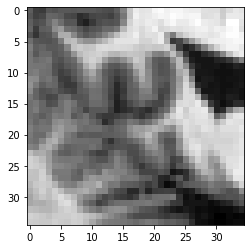

In [ ]:
img1_sl2 = images[0].get_fdata()[:,0,:]
plt.imshow(img1_sl2, cmap='gray')

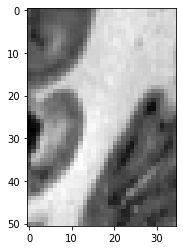

In [ ]:
img1_sl3 = images[0].get_fdata()[0,:,:]
plt.imshow(img1_sl3, cmap='gray')

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [ ]:
# How many bits per pixel are used?
images[0].header['bitpix']

array(32, dtype=int16)

In [ ]:
# What are the units of measurement?
images[0].header['xyzt_units']

array(10, dtype=uint8)

In [ ]:
#  Do we have a regular grid? What are grid spacings?
images[0].header['pixdim']

array([1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# What dimensions represent axial, sagittal, and coronal slices? 
# first is saggital
# second is coronal
# third is axial
# Based on the results from 3D slicer

In [ ]:
volumes = [np.sum(label.get_fdata()>0) for label in labels]


## Plotting some charts

(array([35., 54., 79., 68., 22.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2382. ,  2748.4,  3114.8,  3481.2,  3847.6,  4214. ,  4580.4,
         4946.8,  5313.2,  5679.6,  6046. ,  6412.4,  6778.8,  7145.2,
         7511.6,  7878. ,  8244.4,  8610.8,  8977.2,  9343.6,  9710. ,
        10076.4, 10442.8, 10809.2, 11175.6, 11542. , 11908.4, 12274.8,
        12641.2, 13007.6, 13374. , 13740.4, 14106.8, 14473.2, 14839.6,
        15206. , 15572.4, 15938.8, 16305.2, 16671.6, 17038. , 17404.4,
        17770.8, 18137.2, 18503.6, 18870. , 19236.4, 19602.8, 19969.2,
        20335.6, 20702. ]),
 <a list of 50 Patch objects>)

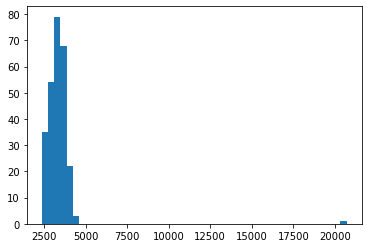

In [ ]:
plt.hist(volumes, bins=50)

<img src="img/nomogram_fem_right.svg" width=400 align=left>

In [ ]:
outliers = np.argwhere(np.array(volumes) > 4500).ravel().tolist()

In [ ]:
for i in outliers:
    names.pop(i)

In [ ]:
os.path.join('/data/TrainingSet/images/', names[0])

'/data/TrainingSet/images/hippocampus_001.nii.gz'

In [ ]:
for img_name in names:
    shutil.copy(os.path.join('/data/TrainingSet/images/', img_name), "out/images/")
    shutil.copy(os.path.join('/data/TrainingSet/labels/', img_name), "out/labels/")    